In [1]:
using DiffEqFlux,OrdinaryDiffEq,Flux,Optim,Plots,DifferentialEquations,CSV,DataFrames
using ForwardDiff

In [56]:
begin
data=CSV.read("w2021-1.csv",DataFrame,header=6)
data0=CSV.read("w2022.csv",DataFrame,header=6)
data1=CSV.read("w2020.csv",DataFrame,header=6)
dataset2021=Array(transpose(Matrix{Float32}(data[1:365,[5]])))
dataset2022=Array(transpose(Matrix{Float32}(data0[1:354,[4]])))
dataset2020=Array(transpose(Matrix{Float32}(data1[1:365,[4]])))
end

1×365 Matrix{Float32}:
 10.2  11.3  12.0  12.2  10.2  12.2  …  14.0  11.8  12.7  13.5  13.1  12.3

In [47]:
dataset2021

1×365 Matrix{Float32}:
 10.5  10.8  8.4  11.4  10.0  6.8  …  14.1  7.6  8.1  9.5  8.9  14.5  6.0

In [63]:
Array(dataset2021[1:364])

364-element Vector{Float32}:
 10.5
 10.8
  8.4
 11.4
 10.0
  6.8
 12.7
  6.5
  8.4
  8.1
  6.5
  5.7
 12.5
  ⋮
 10.0
 11.9
 15.2
 13.5
 13.2
 13.2
 14.1
  7.6
  8.1
  9.5
  8.9
 14.5

In [149]:
x1=Array(transpose(dataset2021[1:364]))
y1=Array(transpose(dataset2021[2:365]))
model=Chain(LSTM(1 => 10), Dense(10 => 1))
function loss(x)
    l=sum(abs2,(model(x)[1:364].-x[2:365]))
end
opt=Adam(Float32(0.01))


Adam(0.009999999776482582, (0.9, 0.999), 1.0e-8, IdDict{Any, Any}())

In [151]:
for i in 1:2000
    Flux.train!(loss,Flux.params(model) , [dataset2021,dataset2021], opt)
end

In [174]:
transpose(model(dataset2021))[1:364]

364-element Vector{Float32}:
 10.486877
 12.587534
 10.065609
 12.82188
 10.146061
 11.76639
 13.072769
 11.636
 10.065609
 10.090321
 11.636
 11.256569
 13.035667
  ⋮
 10.146061
 12.9163685
 13.594955
 13.28664
 13.179577
 13.179577
 13.31002
 12.081902
 10.090321
 10.082447
 10.052835
 13.411243

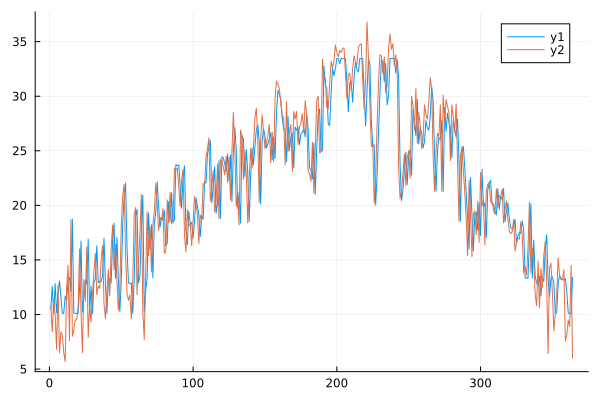

In [179]:
plot(transpose(model(dataset2021))[1:364])
plot!(transpose(dataset2021)[2:365])


In [139]:
for i =1:2000
  grad = gradient(()->loss(x1, y1), Flux.params(model))
  Flux.update!(opt, Flux.params(model), grad)
end

In [194]:
tspan=(Float32(0.0),Float32(1.0))
prob_neuralode = NeuralODE(model, tspan, saveat = 0.02)



NeuralODE()

In [195]:
prob=prob_neuralode(dataset2021)

retcode: Success
Interpolation: 1st order linear
t: 51-element Vector{Float32}:
 0.0
 0.02
 0.04
 0.06
 0.08
 0.1
 0.12
 0.14
 0.16
 0.18
 0.2
 0.22
 0.24
 ⋮
 0.78
 0.8
 0.82
 0.84
 0.86
 0.88
 0.9
 0.92
 0.94
 0.96
 0.98
 1.0
u: 51-element Vector{Matrix{Float32}}:
 [10.5 10.8 … 14.5 6.0]
 [10.710938 11.053133 … 14.769999 6.230248]
 [10.923714 11.30835 … 15.044166 6.4612036]
 [11.1384945 11.565866 … 15.322889 6.6929255]
 [11.355463 11.825921 … 15.606585 6.925478]
 [11.574816 12.088773 … 15.895682 7.1589355]
 [11.796762 12.354696 … 16.19063 7.393378]
 [12.021527 12.623993 … 16.491901 7.6288943]
 [12.249347 12.896983 … 16.79998 7.8655815]
 [12.480479 13.174012 … 17.115341 8.103553]
 [12.715199 13.455443 … 17.438454 8.342929]
 [12.953794 13.741658 … 17.769775 8.583842]
 [13.196574 14.033067 … 18.10976 8.826442]
 ⋮
 [22.525345 24.91574 … 30.466175 17.013699]
 [22.986586 25.420275 … 30.992682 17.423548]
 [23.453081 25.928268 … 31.520905 17.842714]
 [23.92432 26.439362 … 32.05072 18.27095]
 

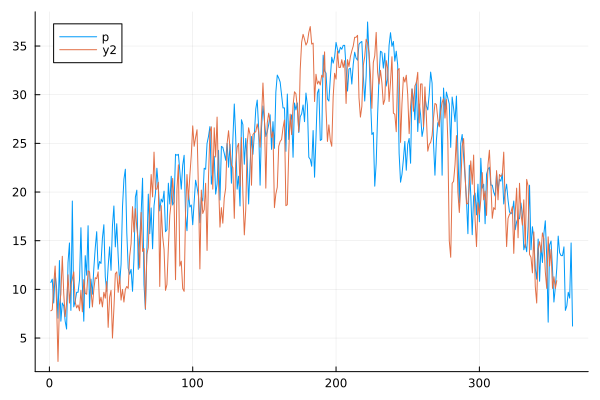

In [200]:
plot(transpose(prob[2]),label='p')
plot!(transpose(dataset2022))

In [201]:
dataset2020

1×365 Matrix{Float32}:
 10.2  11.3  12.0  12.2  10.2  12.2  …  14.0  11.8  12.7  13.5  13.1  12.3

#2

In [204]:
x1=dataset2020
y1=dataset2021
model=Chain(LSTM(1 => 10), Dense(10 => 1))
function loss(x,y)
    l=sum(abs2,model(x).-y)
end
opt=Adam(0.01)
for i =1:3000
  grad = gradient(()->loss(x1, y1), Flux.params(model))
  Flux.update!(opt, Flux.params(model), grad)
end

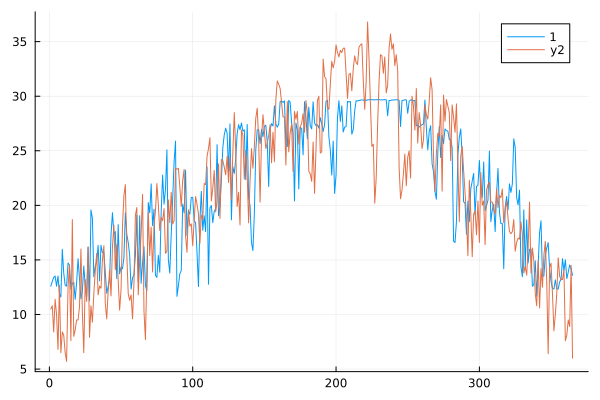

In [208]:
plot(transpose(model(dataset2020)),label=1)
plot!(transpose(dataset2021))

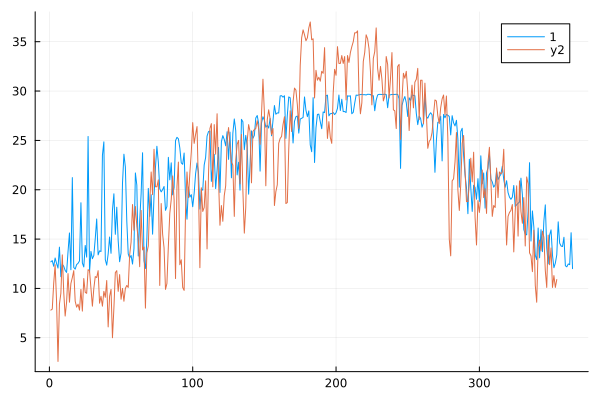

In [209]:
plot(transpose(model(dataset2021)),label=1)
plot!(transpose(dataset2022))

In [228]:
tspan=(Float32(0.0),Float32(1.0))
prob_neuralode = NeuralODE(model, tspan, saveat = 0.03)
prob=prob_neuralode(dataset2021)

retcode: Success
Interpolation: 1st order linear
t: 35-element Vector{Float32}:
 0.0
 0.03
 0.06
 0.09
 0.12
 0.15
 0.18
 0.21
 0.24
 0.27
 0.3
 0.33
 0.36
 ⋮
 0.69
 0.72
 0.75
 0.78
 0.81
 0.84
 0.87
 0.9
 0.93
 0.96
 0.99
 1.0
u: 35-element Vector{Matrix{Float32}}:
 [10.5 10.8 … 14.5 6.0]
 [10.882971 11.186698 … 14.988155 6.3603067]
 [11.27076 11.578673 … 15.49706 6.722186]
 [11.664198 11.97687 … 16.028746 7.0857425]
 [12.064271 12.382396 … 16.584896 7.4511213]
 [12.472147 12.796546 … 17.166462 7.8184977]
 [12.889179 13.220812 … 17.773531 8.188088]
 [13.316875 13.6568165 … 18.405535 8.56017]
 [13.756907 14.106329 … 19.061274 8.935088]
 [14.211098 14.571248 … 19.73891 9.313253]
 [14.681264 15.053424 … 20.43642 9.695175]
 [15.169353 15.554745 … 21.152016 10.081442]
 [15.6770935 16.076822 … 21.883932 10.472788]
 ⋮
 [22.701445 23.262594 … 30.550829 15.4891615]
 [23.451326 24.0215 … 31.365364 16.053299]
 [24.212275 24.79008 … 32.18213 16.641754]
 [24.98241 25.566624 … 33.000828 17.254503]

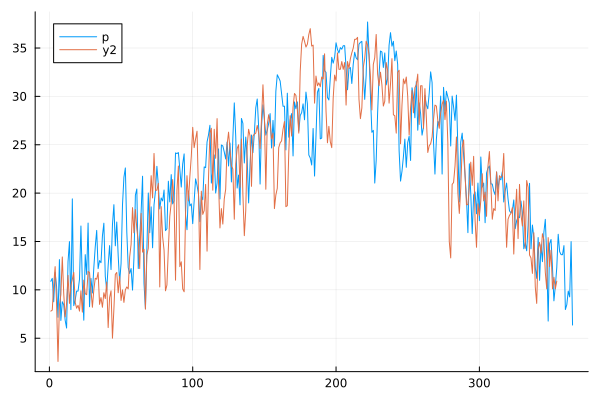

In [229]:
plot(transpose(prob[2]),label='p')
plot!(transpose(dataset2022))

In [264]:
dudt2=Chain(LSTM(1 => 10), Dense(10 => 1))
tspan = (Float32(0.0),Float32(364))
p,re = Flux.destructure(dudt2) # use this p as the initial condition!
dudt(u,p,t) = re(p)(u) # need to restrcture for backprop!
u0=[dataset2020[1]]
prob = ODEProblem(dudt,u0,tspan)
function loss(x)
    pred=Array(solve(prob,Tsit5(),u0=u0,p=p,saveat=1))
    l=sum(abs2,(pred[2:365].-x[2:365]))
end

loss (generic function with 2 methods)

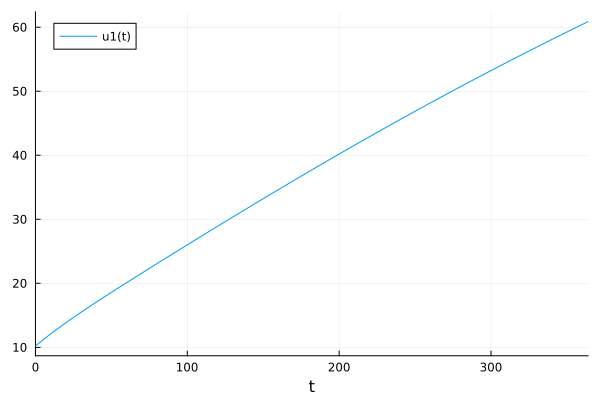

In [246]:
plot(sol)

In [ ]:
loss(datset20)

In [268]:
p1=p

511-element Vector{Float32}:
  0.21688877
 -0.26829147
 -0.058986753
 -0.22593533
  0.21584994
  0.2703601
 -0.21501608
  0.17878625
  0.048907798
  0.35886946
  0.01736892
  0.14997238
 -0.29333442
  ⋮
  0.0
  0.49999237
 -0.08673245
 -0.3994075
  0.5107848
  0.015497927
  0.024931967
 -0.2569531
 -0.08634374
 -0.15052082
  0.2102149
  0.0

In [272]:

Flux.train!(loss(dataset2020),Flux.params(u0,p),[dataset2020], opt)

LoadError: MethodError: objects of type Float32 are not callable
Maybe you forgot to use an operator such as [36m*, ^, %, / etc. [39m?

In [266]:
for i in 1:2000
    Flux.train!(loss,Flux.params(u0,p), opt)
end

LoadError: MethodError: no method matching train!(::typeof(loss), ::Params{Zygote.Buffer{Any, Vector{Any}}}, ::Adam)
[0mClosest candidates are:
[0m  train!(::Any, ::Params, ::Any, [91m::Flux.Optimise.AbstractOptimiser[39m; cb) at ~/.julia/packages/Flux/ZdbJr/src/optimise/train.jl:136
[0m  train!(::Any, ::Params, ::Any, [91m::Optimisers.AbstractRule[39m) at ~/.julia/packages/Flux/ZdbJr/src/deprecations.jl:107
[0m  train!(::Any, ::Any, ::Any, [91m::Optimisers.AbstractRule[39m; cb) at ~/.julia/packages/Flux/ZdbJr/src/train.jl:112
[0m  ...

In [273]:
for i =1:1000
    grad = gradient(()->loss(dataset2020), Flux.params(u0,p))
    Flux.update!(opt, Flux.params(u0,p), grad)
  end

In [274]:
Flux.params(u0,p)[2]

511-element Vector{Float32}:
  0.110403106
 -0.38746002
 -0.13794246
 -0.3121406
  0.25941584
  0.36373806
  0.22052036
  0.23287596
  0.2540506
  0.4505933
  0.01736892
  0.14997238
 -0.29333442
  ⋮
  0.0
  0.6557343
  0.02881621
 -0.38722986
  0.41207612
  0.21602765
 -0.6097009
 -0.6897992
 -0.0342582
 -0.68686706
  0.22656022
  0.014343696

In [275]:
sol1=solve(prob,Tsit5(),u0=u0,p=Flux.params(u0,p)[2],saveat=1)

retcode: Success
Interpolation: 1st order linear
t: 365-element Vector{Float32}:
   0.0
   1.0
   2.0
   3.0
   4.0
   5.0
   6.0
   7.0
   8.0
   9.0
  10.0
  11.0
  12.0
   ⋮
 353.0
 354.0
 355.0
 356.0
 357.0
 358.0
 359.0
 360.0
 361.0
 362.0
 363.0
 364.0
u: 365-element Vector{Vector{Float32}}:
 [9.547748]
 [9.728643]
 [9.908655]
 [10.087931]
 [10.266605]
 [10.444801]
 [10.62263]
 [10.800189]
 [10.977554]
 [11.154796]
 [11.331954]
 [11.509057]
 [11.686108]
 ⋮
 [19.997652]
 [19.99765]
 [19.997648]
 [19.997648]
 [19.997648]
 [19.997648]
 [19.99765]
 [19.997652]
 [19.997656]
 [19.997662]
 [19.997665]
 [19.99767]

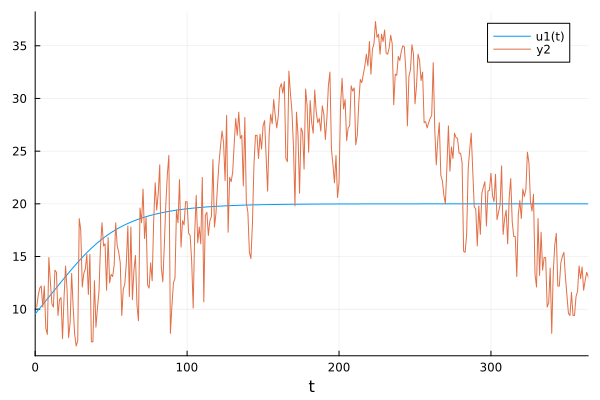

In [279]:
plot(sol1)
plot!(transpose(dataset2020))

In [ ]:
dudt2=Chain(LSTM(2 => 10), Dense(10 => 2))
tspan = (Float32(0.0),Float32(364))
prob_neuralode = NeuralODE(dudt2, tspan, saveat = 1)
function loss(x,y)
    l=sum(abs2,(model(x)[2:365].-y[2:365]))
end